# Exercise 1 on Clustering: Toy Datasets

First, we perform clustering on a simple dataset to illustrate how clustering works.


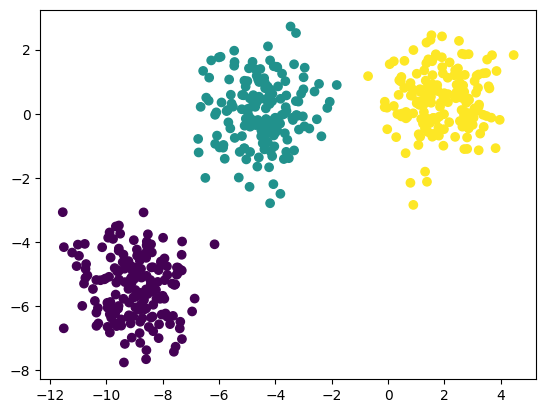

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets

n_samples = 500
random_state = 170

# create dataset
dataset = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 1.0, 1.0], random_state=random_state)
X = dataset[0] # data
y = dataset[1] # labels


plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

## K-Means

K-Means clusters the points based on their Euclidean distance $d_{i,j} = ||\mathbf{x}_i -  \mathbf{x}_j||^2_2$. The goal is to minimize the distance between points in the same cluster, and maximize the distance between points from different clusters.

The objective function is
\begin{equation}
    \sum_{i=0}^n \min(||\mathbf{x}_i - \boldsymbol{\mu}_j||^2_2) \ \ \ j = 1, \dots, n_c
\end{equation}

which is also called the inertia.


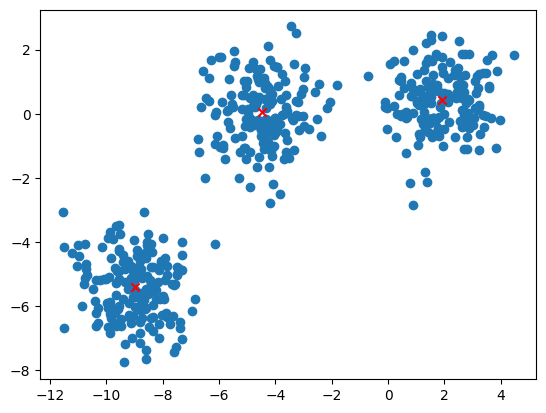

In [7]:
import matplotlib.pyplot as plt

# To do:
# - center the dataset
#Centered_dataset = dataset - np.mean((dataset))
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3, random_state=0,n_init="auto").fit(X)

centroids = kmean.cluster_centers_

plt.scatter(dataset[0][:,0], dataset[0][:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroids')
# - apply KMeans https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
# - plot the data with the centroids and the labels found by KMeans

# Clustering to do LPCA

The goal of the exercise is to do clustering on a dataset representing a noisy 2D non-linear function.
* How do we select the correct number of clusters?
* Why LPCA works better than PCA on a non-linear dataset?

First thing, we create our synthetic dataset

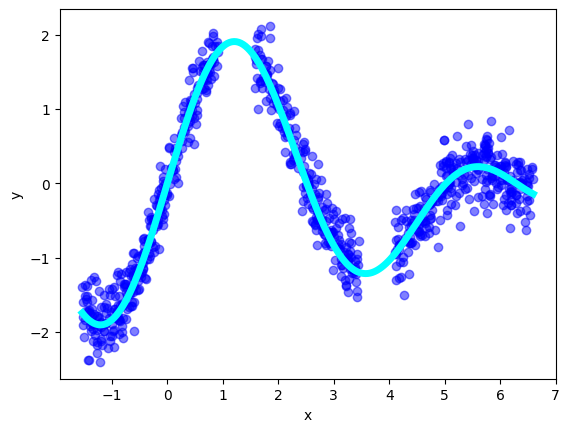

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

def non_linear_func_orig(x):
    y = np.sin(x) + np.sin(1.5*x)
    return y

def non_linear_func(x):
    y = np.sin(x) + np.sin(1.5*x) + 0.25*np.random.randn(x.size)
    return y

# This code is used to create our synthetic dataset
size = 1000
seed = 42
np.random.seed(seed)

x = np.random.rand(size) * 2.6*np.pi - np.pi/2
y = non_linear_func(x)

limits = [np.pi/2.5, 1.2*np.pi]
eps = np.pi/10

mask = ((x < limits[0] + eps) & (x > limits[0] - eps)) | (x < limits[1] + eps) & (x > limits[1] - eps)
x = x[~mask]
y = y[~mask]

X = np.zeros((x.size, 2))
X[:,0] = x
X[:,1] = y

x_orig = np.linspace(x.min(), x.max(), 200)
y_orig = non_linear_func_orig(x_orig)

# We can plot the dataset and the original non-linear function
plt.scatter(X[:,0], X[:,1], c='b', alpha=0.5)
plt.plot(x_orig, y_orig, c='cyan', lw=5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## Global PCA
Now we apply the PCA and try to reconstruct the dataset using only one dimension.
 - To do:
    - obtain X_std (dataset preprocessed with mean and STD)
    - apply PCA
    - recontruct the solution with one dimension (q=1)
        -hint:
            - X     = Z  @ A.T
            - X_rec = Zq @ Aq.T
    - plot the reconstruction vs the original dataset


 - hint: the documentation and examples to use the PCA object are at:
       https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


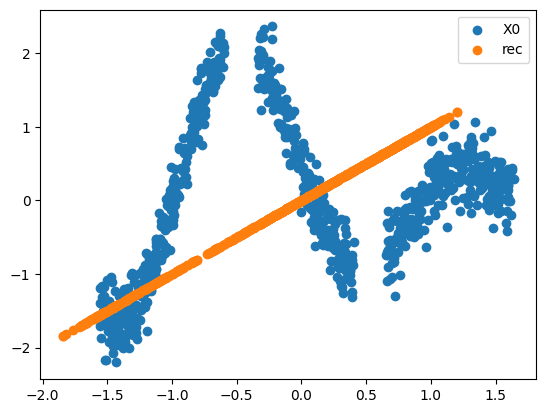

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



X0 = StandardScaler().fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=1)  # we willen 1D
X_pca = pca.fit_transform(X0)
X_rec = pca.inverse_transform(X_pca)

plt.scatter(X0[:,0], X0[:, 1], label="X0")
plt.scatter(X_rec[:,0], X_rec[:, 1], label="rec")
plt.legend()


# To do:
# - Apply PCA
# - Reconstruct with a single PC

## Clustering

We can try and improve the reconstruction accuracy using a local approach. The first thing to do is then to cluster the dataset using kmeans.
- To do:
    - Use KMeans object to obtain the cluster labels or indexes (=`idx`). init = 'random' and n_init='auto'
    - Use a number of clusters (k) of your choice.
    - Plot the dataset and colour it by the value of the label

In [ ]:
# To do:
# - Apply KMeans to the dataset

## Selection of the clusters' number

In this case we can visually identify the number of clusters, because we have only two dimensions. In higher dimensions, it is not possible to visualize the dataset. Also, we would prefer to have an automatic method to select the correct number of clusters.

We can use the Davies-Boulding score to estimate the number of clusters (https://scikit-learn.org/stable/modules/clustering.html#davies-bouldin-index)

- To do:
    - Calculate the DB score for a range of k (number of clusters) that goes from 2 to 10.
    - Plot the DB score as a function of k.
    - Select n_clusters based on the DB score
   
   
- Hint:
    - the documentation and examples to use the PCA object are at:
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html
    - you can use a 'for' loop to calculate the DB for different k


In [ ]:
# To do:
# Compute and plot the DB index for n_cluster = 2 to 10

## Local PCA

Now we can apply the PCA in each cluster.
- To do:
    - apply PCA for each cluster
    - plot the reconstruction using only the first PC.
- Hint:
    - Use a 'for' loop to apply the PCA in each cluster.
    - to select only the data of a single cluster use a mask:
           To select the data with label 0:
             mask = (idx == 0)
             X_k = X[mask]
    - To get the correct reconstruction, you need to **center and scale** the data **in each cluster** before applying the PCA, and then de-center and de-scale the data

In [ ]:
# To do:
# - Apply PCA to each cluster

## Local PCA with VQPCA

We can compare the KMEANS results with VQPCA. To perform VQPCA, we need the [OpenMORe](https://github.com/burn-research/OpenMORe) library. You can run the next cell to install it.
VQPCA is a clustering algorithm that assign points to the clusters based on the reconstruction error, so it tries to find clusters that can be well represented by a linear manifold.

In [ ]:
! git clone https://github.com/burn-research/OpenMORe.git

import sys

sys.path.insert(0,'/content/OpenMORe')

In [ ]:
import OpenMORe.clustering as clustering


# This is a dictionary used to set the VQPCA parameters.
settings_clustering = {
    #centering and scaling options
    "center"                    : True,
    "centering_method"          : "mean",
    "scale"                     : True,
    "scaling_method"            : "auto",

    #set the initialization method (random, observations, kmeans, pkcia, uniform)
    "initialization_method"     : "uniform",

    #set the number of clusters and PCs in each cluster
    "number_of_clusters"        : 3,
    "number_of_eigenvectors"    : 1,

    #enable additional options:
    "correction_factor"         : "off",    # --> enable eventual corrective coefficients for the LPCA algorithm:
                                            #     'off', 'c_range', 'uncorrelation', 'local_variance', 'phc_multi', 'local_skewness' are available

    "classify"                  : False,    # --> call the method to classify a new matrix Y on the basis of the lpca clustering
    "write_on_txt"              : False,    # --> write the idx vector containing the label for each observation
    "evaluate_clustering"       : True,     # --> enable the calculation of indeces to evaluate the goodness of the clustering
    "neighbors_number"          : 0,

    "kNN_post"                  : False,     # activate the kNN algorithm once the convergence is achieved
}

# To do: follow the example in
# https://github.com/burn-research/OpenMORe/blob/master/examples/clustering/lpcaExample.py
# to find the vqpca labels, then plot the clusters

# First we create the model and then we fit it to the dataset
model = clustering.lpca(X, settings_clustering)
idx_vqpca = model.fit()

In [ ]:
# To do:
# - Apply PCA to each cluster